In [1]:
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
import numpy as np

2024-10-27 13:36:52.648072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730007412.661504  211225 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730007412.665414  211225 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 13:36:52.680757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = Path('./Housing.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

for i,row in enumerate(header_row):
    print(i,row)

0 price
1 area
2 bedrooms
3 bathrooms
4 stories
5 mainroad
6 guestroom
7 basement
8 hotwaterheating
9 airconditioning
10 parking
11 prefarea
12 furnishingstatus


In [3]:
x_data_list,y_data_list = [], []
m = 0
n = 4 # Area, Bedrooms, Bathrooms, Stories

for row in reader:
    x_data_row = [float(row[i]) for i in range(1,n+1)]
    y_data_row = float(row[0])
    x_data_list.append(x_data_row)
    y_data_list.append(y_data_row)
    m += 1
print(x_data_list[0])

[7420.0, 4.0, 2.0, 3.0]


In [4]:
x_data = np.array(x_data_list,dtype='float32').reshape(m,n)
y_data = np.array(y_data_list,dtype='float32').reshape(m,1)
print(x_data.shape,y_data.shape)

(545, 4) (545, 1)


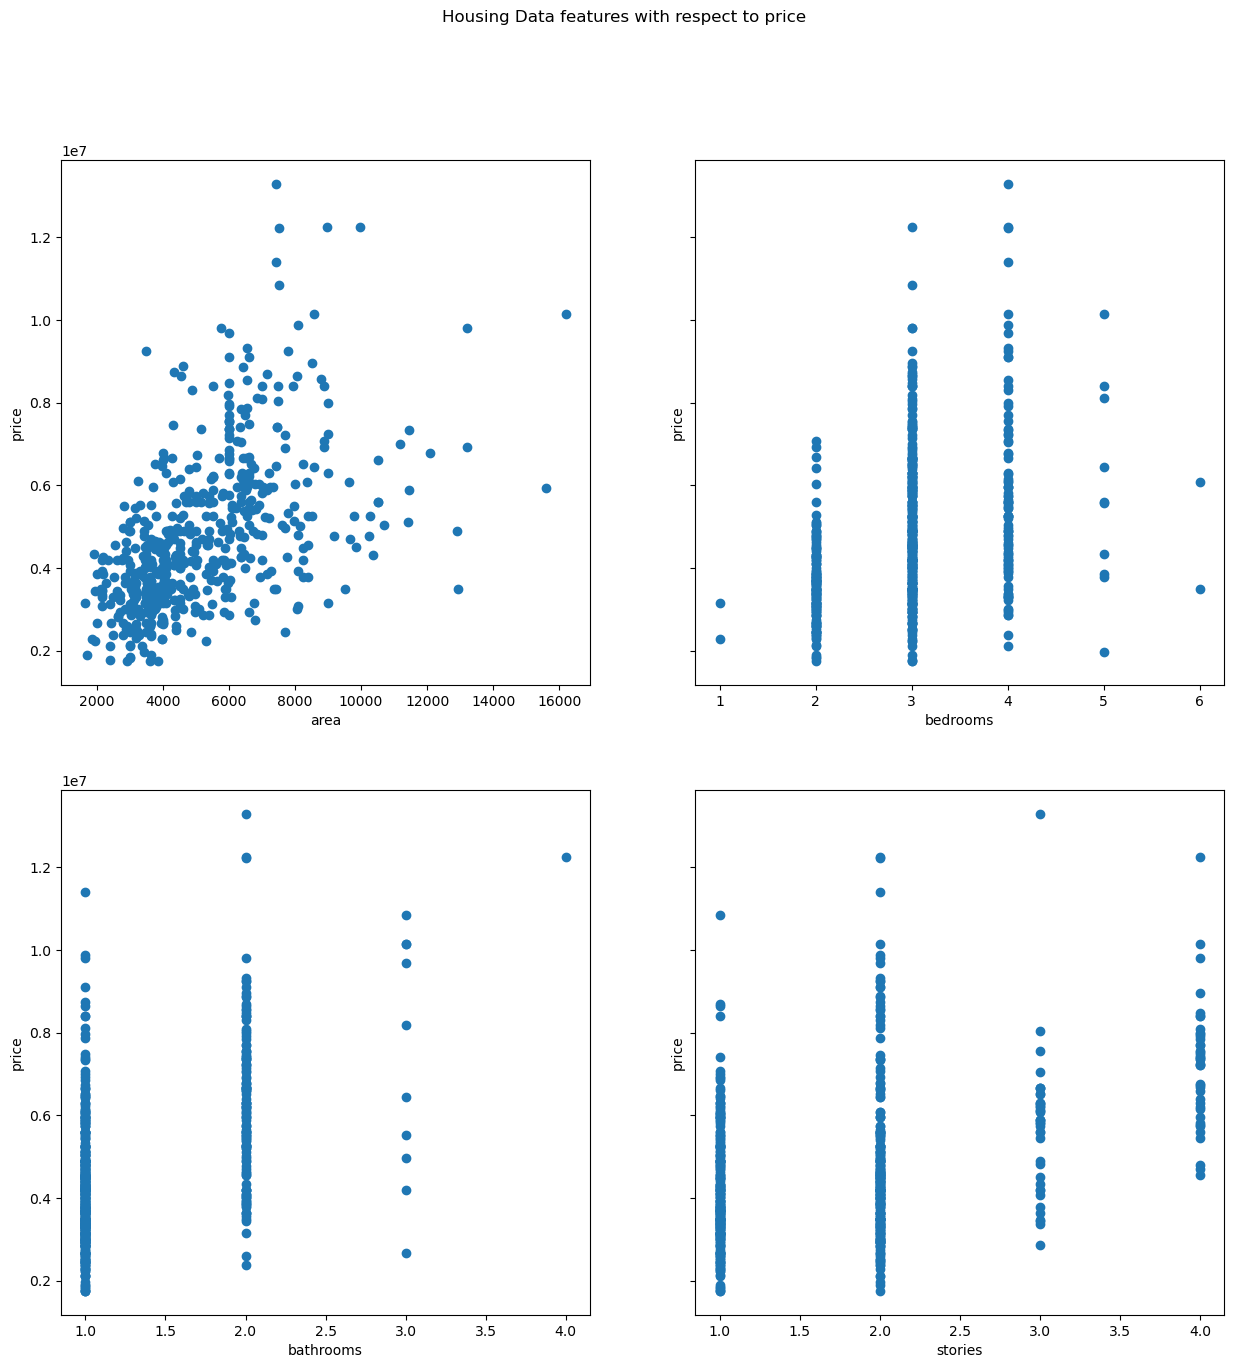

In [5]:
fig,ax = plt.subplots(2,2,sharey=True,figsize=(15,15))
fig.suptitle('Housing Data features with respect to price')

for i in range(n):
    ax[i//2,i%2].scatter(x_data[:,i],y_data)
    ax[i//2,i%2].set_xlabel(header_row[i+1])
    ax[i//2,i%2].set_ylabel(header_row[0])
    
plt.show()

In [6]:
norm_x = tf.keras.layers.Normalization(axis=-1)
norm_x.adapt(x_data)
x_data_normalized = norm_x(x_data)

norm_y = tf.keras.layers.Normalization(axis=-1)
norm_y.adapt(y_data)
y_data_normalized = norm_y(y_data) # I made am mistake here, since I didn't normalize y_data the scaling with MSE loss is too big

print(x_data_normalized[0])
print(x_data[0])

I0000 00:00:1730007415.258674  211225 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2179 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


tf.Tensor([1.0467263 1.4034191 1.4218105 1.3782146], shape=(4,), dtype=float32)
[7.42e+03 4.00e+00 2.00e+00 3.00e+00]


In [7]:
print(x_data.shape)
model = Sequential([
    Input(shape=(x_data_normalized.shape[1],)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model with normalized data
model.fit(x_data_normalized, y_data_normalized, epochs=1000)

(545, 4)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
 5/18 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 2.6285

I0000 00:00:1730007416.330729  211335 service.cc:148] XLA service 0x7aebb8005880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730007416.330754  211335 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-27 13:36:56.342511: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730007416.372048  211335 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1730007416.490862  211335 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9204 
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 3.1750
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 2.7373
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 2.7503
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 2.9537
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 2.7832
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 2.3598
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 2.5626
Epoch 9/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 2.4490
Epoch 10/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 2.4093
Epoch 11/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 2.4163
Epoch 12/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 2.4469
Epoch 13/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 2.5247
Epoch 14/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 2.8384
Epoch 15/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


tf.Tensor([6.1458586e+09], shape=(1,), dtype=float32)


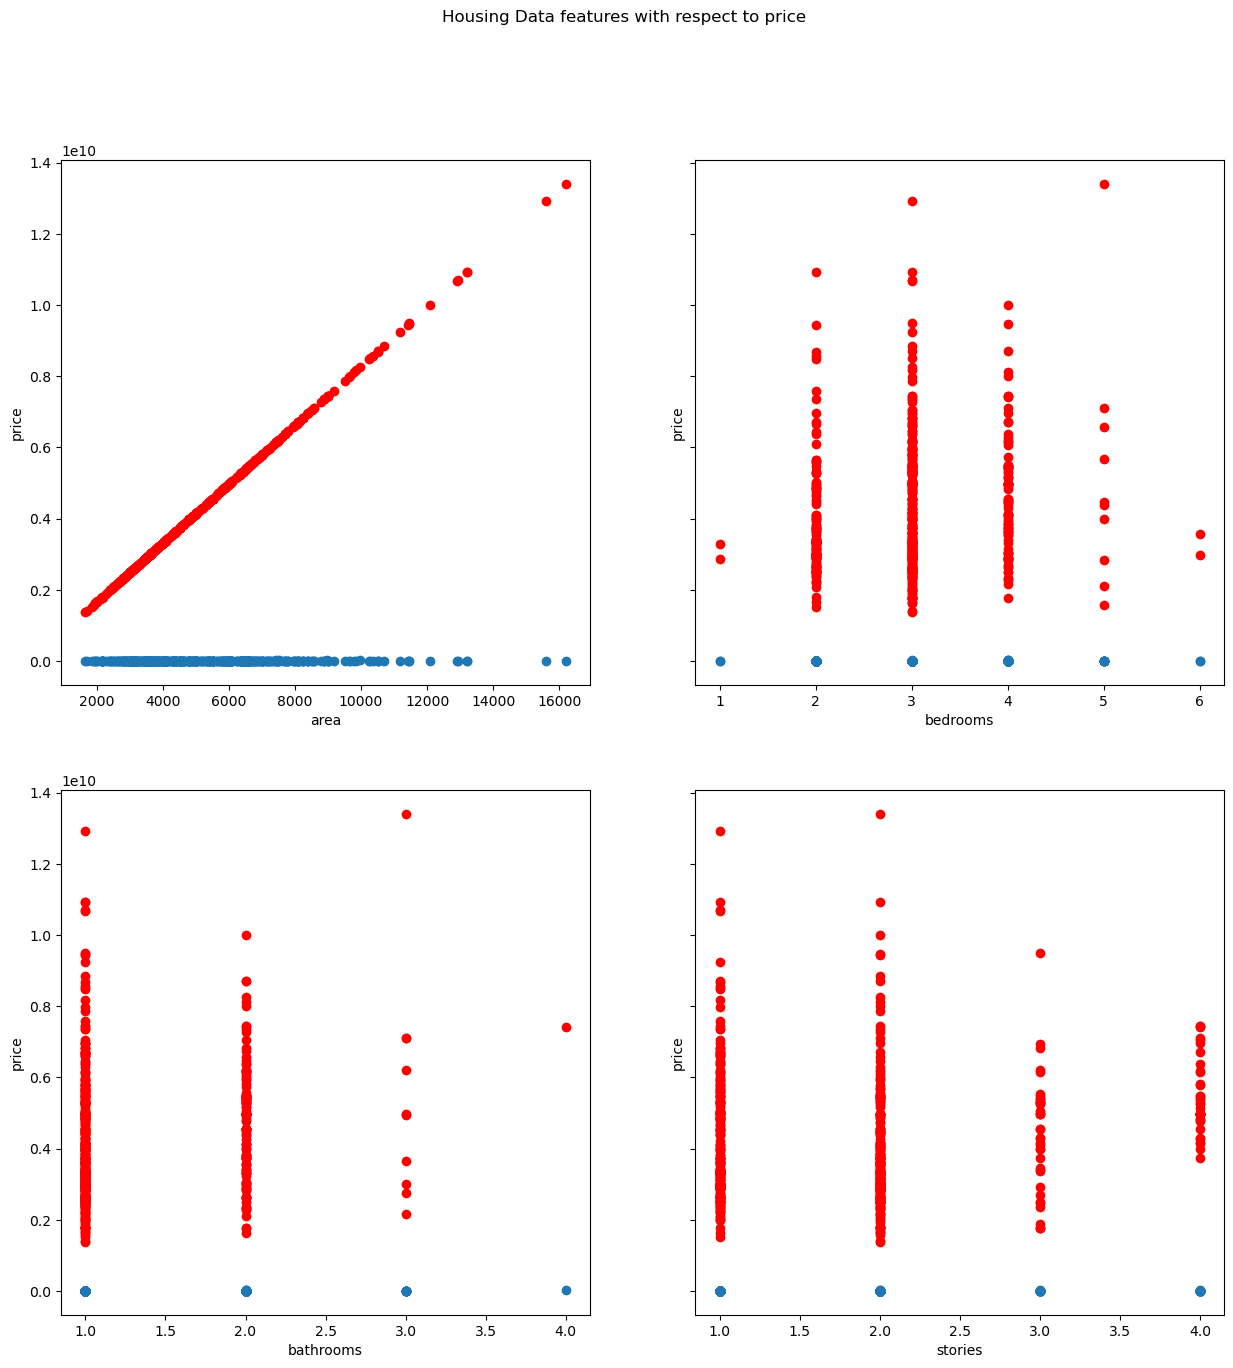

In [9]:
y_predict_normalized = model.predict(x_data_normalized)
y_predict = norm_y.mean + y_predict_normalized * norm_y.variance**0.5
print(y_predict[0])
# # Plot prediction

fig,ax = plt.subplots(2,2,sharey=True,figsize=(15,15))
fig.suptitle('Housing Data features with respect to price')
for i in range(n):
    ax[i//2,i%2].scatter(x_data[:,i],y_data)
    ax[i//2,i%2].scatter(x_data[:,i],y_predict,color="red")
    ax[i//2,i%2].set_xlabel(header_row[i+1])
    ax[i//2,i%2].set_ylabel(header_row[0])
plt.show()